# Baseline Model

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,fbeta_score,confusion_matrix,plot_confusion_matrix
from sklearn.dummy import DummyClassifier

### Load data

In [7]:
#This csv file was created in the EDA notebook
data = pd.read_csv('../data/data_info.csv')
data

,cbb,cbsd,cgm,cmd,healthy,total
0,466,1443,773,2658,316,5656


><p style="text-align:justify"><span>From our dataset we see that the probability for CMD(3) is <b>46.99%</b>,that for CBB(0) <b>8.24%</b>, CBSD(1) <b>25.51%</b>, CGM(2) <b>13.67%</b> and a Healthy(4) one <b>5.59%</b>. Our baseline model is a probability function where its prediction is based on a label with the highest probability rate which is CMD. This model will always predict CMD independent of the image that it is given to. This gives us already an accuracy of 46.99%. However, due to the imbalanced nature of our dataset accuracy can be a misleading metric in our modeling.</span></p>

<span style='text-align: justify'>A better metric for estimating imbalanced data is the $F_{\beta}$ score. In the following estimation of the $F_{\beta}$ score we assigned the "average" parameter to "macro", which will put more emphasis on the false negative or class II error. See below for the explanation of the values of the parameters:</span>

><b>'binary':</b>
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

><b>'micro':</b>
Calculate metrics globally by counting the total true positives, false negatives and false positives.

><b>'macro':</b>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

><b>'weighted':</b>
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

><b>'samples':</b>
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In the case of weighted average the performance metrics are weighted accordingly:

$score_{weighted\text{-}avg} = 0.0824 \cdot score_{class\text{ }0} + 0.0.2551 \cdot score_{class\text{ }1} + 0.1367 \cdot score_{class\text{ }2} + ...$

Which will give us a higher F2 score due the class imbalance.

However, macro avg is not weighted and therefore:

$score_{macro\text{-}avg} = 0.5 \cdot score_{class\text{ }0} + 0.5 \cdot score_{class\text{ }1} + 0.5 \cdot score_{class\text{ }2} + ...$

Source: [StackExchange](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin) |
        [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html)

### Create a dictionary of image labels and their relative path

In [ ]:
images_dict = {
                0: [i for i in glob.glob(os.path.join(path,'cbb/*.jpg'))],
                1: [i for i in glob.glob(os.path.join(path,'cbsd/*.jpg'))],
                2: [i for i in glob.glob(os.path.join(path,'cgm/*.jpg'))],
                3: [i for i in glob.glob(os.path.join(path,'cmd/*.jpg'))],
                4: [i for i in glob.glob(os.path.join(path,'healthy/*.jpg'))]
                }

### Preprocess data: create vector from raw image file and resize it

In [ ]:
# create a 3D tensor from images
# convert the images into arrays of pixels and attach them to the list "X", the corresponsting labels are store in the list "y".
X, y = [], []

for labels, images in images_dict.items():
    for image in images:
        img = cv2.imread(''.join(image))
        resized_img = cv2.resize(img, dsize=(224,224))
        X.append(resized_img)
        y.append(labels)

In [ ]:
# create a numpy_array
X=np.array(X)
y=np.array(y)

In [ ]:
# rescale X
X = X.astype(np.float32)/ 255.
y = y.astype(np.int32)

### Data segregation into train and test sets

In [ ]:
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In supervised learning, a simple sanity check consists of comparing one’s estimator against simple rules of thumb. The target will be to beat the classifier that makes predictions using simple rules. DummyClassifier implements several such simple strategies for classification:
<ul>
<li><b>stratified</b> generates random predictions by respecting the training set class distribution.

<li><b>most_frequent</b> always predicts the most frequent label in the training set.

<li><b>prior</b> always predicts the class that maximizes the class prior (like most_frequent) and predict_proba returns the class prior.

<li><b>uniform</b> generates predictions uniformly at random.
</ul>

Source: [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

We will first use the dummy classifier that will always predict the most frequent class in the dataset:

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent',random_state=42)
dummy_clf.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

Now we can make a prediction with the testdataset and analyse the accuracy and the F_beta_score. We can visulise the results in a confusion matrix. 

In [ ]:
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
beta_score_recall = fbeta_score(y_test, y_pred, average='macro', beta=2)
print(f'baseline accuracy : {accuracy.round(2)}')
print(f'F_beta_score_recall: {beta_score_recall.round(2)}')


baseline accuracy : 0.46
F_beta_score_recall: 0.16


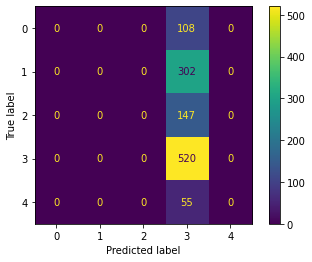

In [ ]:
plot_confusion_matrix(dummy_clf,X_test,y_test)
plt.show()

### Alternative method to predict the probability of the majority class

In [ ]:
y_pred = [3] * len(data.label)
score = accuracy_score(data.label, y_pred)
beta_score_recall = fbeta_score(data.label , y_pred, average='macro', beta=2)
print(f'baseline accuracy : {score.round(2)}')
print(f'F_beta_score_recall: {beta_score_recall.round(2)}')

baseline accuracy : 0.47
F_beta_score_recall: 0.16


### Binary classification

In a binary classification task, the terms ‘’positive’’ and ‘’negative’’ refer to the classifier’s prediction, and the terms ‘’true’’ and ‘’false’’ refer to whether that prediction corresponds to the external judgment (sometimes known as the ‘’observation’’). Given these definitions, we can formulate the following table:

<table style='border-style:solid'>
    <tr>
        <th style='border-style:solid'></th>	
        <th style='border-style:None'>Actual class (observation)</th>
        <th style='border-style:None'></th>
    </tr>
    <tr>
        <th style='border-style:None'>Predicted class
        (expectation)</th>
        <td style='border-style:solid'>Tp (true positive)|
        Correct result</td>
        <td style='border-style:solid'>Fp (false positive)|
        Misclassified</td>
    </tr>
    <tr>
        <td style='border-style:None'></td>
        <td style='border-style:solid'>Fn (false negative)|
        Misclassified</td>
        <td style='border-style:None'>Tn (true negative)|
        Correct result</td>
    </tr>
</table>

In this context, we can define the notions of precision, recall and F-measure:

$\text{precision} = \frac{tp}{tp + fp}$,

$\text{recall} = \frac{tp}{tp + fn}$,

$F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}$

Source: [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

Now, we will use the dummy classifier that will make predictions based on the frequencies of the different classes in the dataset:

In [ ]:
dummy_clf = DummyClassifier(strategy='stratified',random_state=42)
dummy_clf.fit(X_train,y_train)

DummyClassifier(random_state=42, strategy='stratified')

In [ ]:
y_pred = dummy_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
beta_score_recall = fbeta_score(y_test, y_pred, average='macro', beta=2)
print(f'baseline accuracy : {accuracy.round(2)}')
print(f'F_beta_score_recall: {beta_score_recall.round(2)}')


baseline accuracy : 0.3
F_beta_score_recall: 0.19


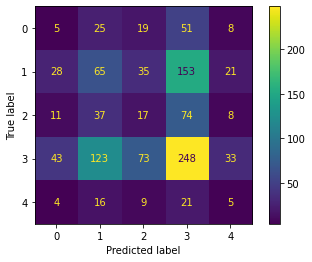

In [ ]:
plot_confusion_matrix(dummy_clf,X_test,y_test)
plt.show()

In [ ]:
cm[:4,:4]

array([[  5,  25,  19,  51],
       [ 28,  65,  35, 153],
       [ 11,  37,  17,  74],
       [ 43, 123,  73, 248]])

In [ ]:
print(f' True Negative for the healthy class = {np.sum(cm[:4,:4])}')

 True Negative for the healthy class = 1007


In [ ]:
cm[:4,4]

array([ 8, 21,  8, 33])

In [ ]:
print(f' False positive for the healthy class = {np.sum(cm[:4,4])}')

 False positive for the healthy class = 70


In [ ]:
cm[4,:4]

array([ 4, 16,  9, 21])

In [ ]:
print(f' False negative for the healthy class = {np.sum(cm[4,:4])}')

 False negative for the healthy class = 50


In [ ]:
print(f' True positive for the healthy class = {np.sum(cm[4,4])}')

 True positive for the healthy class = 5


In [ ]:
precision = 5/(5+70)
print(f'Classification Precision: {round(precision,3)}')

Classification Precision: 0.067


In [ ]:
recall = 5/(5+50)
print(f'Classification Sensitivity: {round(recall,3)}')


Classification Sensitivity: 0.091


In [ ]:
F2 = (1+pow(2,2))*(precision*recall/(pow(2,2)*precision+recall))
print(f'F2-score for the healthy class: {round(F2,3)}')

F2-score for the healthy class: 0.085


## Results

Although the accuracy of the stratified DummyClassifier is lower (0.3) compared to the most_frequent DummyClassifier (0.47), the F2 score is a little bit better (0.19 compared to 0.16). Therefore, we are chosing the stratified DummyClassifier as our baseline model. The more complex models that we will implement later will have to beat this simple algorithm. 